# Experimenting with Filters in a Simple CNN (for FMNIST data)

This is a simple classification model built for classifying the FMNIST dataset. The example closely follows the lessons available at Coursera's [Tensorflow Specialization](https://www.deeplearning.ai/tensorflow-in-practice/), taught by Andrew Ng and Lawerence Moroney. We use the tf.keras API to build a `Sequential` model in Keras that uses convolution (`Conv2D`), pooling (`MaxPooling2D`)and fully connected (`Dense`) layers to process FMNIST images and classify them.

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

**Note:** We use Tensorflow version 1.x here. Equally, you could use any version of TF and this code should work.

In [34]:
print(tf.__version__)

1.13.1


In [2]:
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images / 255.0
test_images=test_images / 255.0

4423680/4422102 [==============================] - 1s 0us/step


In [19]:
training_images.shape

(60000, 28, 28)

In [20]:
test_images.shape

(10000, 28, 28)

## Visualizing some of the sample images 

* FMNIST is a collection of fashion centric image data - different kinds of clothing essentially.
* These are in grayscale, and have labels associated with them.

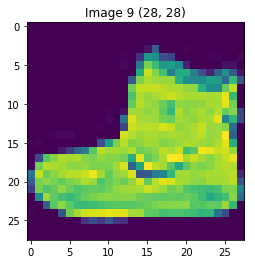

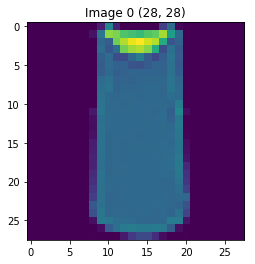

In [18]:
plt.title('Image '+str(training_labels[0])+" "+str(training_images[0].shape))
plt.imshow(training_images[0])
plt.show()
plt.title('Image '+str(training_labels[2])+" "+str(training_images[2].shape))
plt.imshow(training_images[2])
plt.show()

## Preparing the Data: Reshaping the Tensors

We have to reshape the input tensors to be able to feed the 28x28 grayscale (single channel) images to the neural network we're building for classifying the records based on the labels. The original shape (count x depth_pixels x height_pixels) doesn't indicate the number of channels. Therefore, we reshape these tensors into a list of single channel images each.

In [21]:
xtr, xts = training_images.reshape(60000,28,28,1), test_images.reshape(10000,28,28,1)

We now build a sequential model in tf.keras, with one convolutional layer, with a relu activation, and a pooling layer to compress the convolution output. We then build fully connected layers towards the latter part of the network finally resulting in a 10 class softmax output.

## Defining a CNN

The benefit of a convolutional network is to detect key features in the image that may be used to differentiate images from one another and associate them with different class labels. Here we use 32 filters in the convolutional layer into which we feed the 60000 training images from the FMNIST dataset. 

The below model has the following characteristics:
1. 32 filters in the Conv2D layer
2. A 3x3 size filter is used in each case
3. ReLU (Rectified Linear Unit) activation on the convolutional layer
4. 2X2 Max Pooling layer to compress the image post-convolution.
5. Adam optimizer - we could potentially use SGD, Nesterov, or RMSProp, but we'll just go with Adam here.
6. We print the accuracy in the training history for the model.

In [22]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.fit(xtr, training_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 7s 122us/sample - loss: 0.3976 - acc: 0.8602
Epoch 2/10
60000/60000 [==============================] - 7s 119us/sample - loss: 0.2674 - acc: 0.9023
Epoch 3/10
60000/60000 [==============================] - ETA: 0s - loss: 0.2216 - acc: 0.918 - 8s 126us/sample - loss: 0.2215 - acc: 0.9187
Epoch 4/10
60000/60000 [==============================] - 7s 125us/sample - loss: 0.1872 - acc: 0.9316
Epoch 5/10
60000/60000 [==============================] - 7s 124us/sample - loss: 0.1593 - acc: 0.9408
Epoch 6/10
60000/60000 [==============================] - 7s 123us/sample - loss: 0.1363 - acc: 0.9485
Epoch 7/10
60000/60000 [==============================] - 7s 125us/sample - loss: 0.1166 - acc: 0.9568
Epoch 8/10
60000/60000 [==============================] - 7s 125us/sample - loss: 0.0975 - acc: 0.9634
Epoch 9/10
60000/60000 [==============================] - 8s 134us/sample - loss: 0.0821 - acc: 0.9696
Epoch 10/10
60000/60000 [==========

In [26]:
test_loss, test_acc = model.evaluate(xts, test_labels)
print(test_acc)

10000/10000 [==============================] - 1s 74us/sample - loss: 0.3148 - acc: 0.9135
0.9135


## Early stopping

If we're targeting the accuracy of the network to be in the ballpark of 99%, we could allow the network to train until then and then stop the training process. We can do this by sending callbacks to the fit() method of the model, and stopping training when a certain loss or accuracy has reached.

In [27]:
class callbackClass(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
            if(logs.get('acc')>0.99):
                print("\nReached 99% accuracy so cancelling training!")
                self.model.stop_training = True

In [28]:
accuracy_filter = callbackClass()

Note that the model starts training from the previous saved state of weights. This is because we had executed training earlier, and are now essentially continuing that process for an additional 20 epochs, as long as we don't reach 99% accuracy.

In [29]:
model.fit(xtr, training_labels, epochs=20, callbacks=[accuracy_filter])

Epoch 1/20
60000/60000 [==============================] - 7s 120us/sample - loss: 0.0591 - acc: 0.9786
Epoch 2/20
60000/60000 [==============================] - 7s 119us/sample - loss: 0.0523 - acc: 0.9809
Epoch 3/20
60000/60000 [==============================] - 8s 131us/sample - loss: 0.0423 - acc: 0.9846
Epoch 4/20
60000/60000 [==============================] - 7s 120us/sample - loss: 0.0387 - acc: 0.9858
Epoch 5/20
60000/60000 [==============================] - 8s 125us/sample - loss: 0.0349 - acc: 0.9877
Epoch 6/20
60000/60000 [==============================] - 8s 129us/sample - loss: 0.0304 - acc: 0.9897
Epoch 7/20
59616/60000 [============================>.] - ETA: 0s - loss: 0.0269 - acc: 0.9903
Reached 99% accuracy so cancelling training!
60000/60000 [==============================] - 8s 127us/sample - loss: 0.0269 - acc: 0.9903


As you can see here, the training stopped at an accuracy score of 99.03%. The training always stops at the end of an epoch here, given the way the `callbackClass.on_epoch_end()` method has been implemented.

## Experimenting with more filters

We now introduce 128 filters in the first layer, and in doing so, build a new model, `model2`. All other parameters remain unchanged.

In [31]:
model2 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [32]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 128)       1280      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 128)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 21632)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               2769024   
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 2,771,594
Trainable params: 2,771,594
Non-trainable params: 0
_________________________________________________________________


Let's now call the fit() method on the new model, to experiment with it and see how quickly it gets to 99% accuracy. Training here happens slower in each epoch, because the number of filters has been increased many fold, and there is likely to be a proportionate increase in the amount of time to get through each epoch.

We observe that:

1. Compared to `model` with 32 filters, `model2` reaches higher accuracy rates in earlier epochs, starting off with a slightly greater accuracy in Epoch 1
2. Each epoch, as explained earlier, takes more time to complete because of the increased number of filters.
3. At the end of 10 epochs, the original model had 97.28% accuracy, whereas `model2` has reached this milestone in epoch 9, while finishing epoch 10 at 97.97% accuracy. We're getting very close by epoch 10!
4. Finally, `model2` was able to reach 99% accuracy 2 full epochs earlier than `model`

In [33]:
model2.fit(xtr, training_labels, epochs=20, callbacks=[accuracy_filter])

Epoch 1/20
60000/60000 [==============================] - 17s 282us/sample - loss: 0.3719 - acc: 0.8662
Epoch 2/20
60000/60000 [==============================] - 17s 280us/sample - loss: 0.2524 - acc: 0.9082
Epoch 3/20
60000/60000 [==============================] - 17s 282us/sample - loss: 0.2060 - acc: 0.9239
Epoch 4/20
60000/60000 [==============================] - 17s 291us/sample - loss: 0.1685 - acc: 0.9380
Epoch 5/20
60000/60000 [==============================] - 18s 303us/sample - loss: 0.1414 - acc: 0.9471
Epoch 6/20
60000/60000 [==============================] - 19s 320us/sample - loss: 0.1166 - acc: 0.9576
Epoch 7/20
60000/60000 [==============================] - 20s 329us/sample - loss: 0.0962 - acc: 0.9647
Epoch 8/20
60000/60000 [==============================] - 20s 339us/sample - loss: 0.0801 - acc: 0.9712
Epoch 9/20
60000/60000 [==============================] - 21s 348us/sample - loss: 0.0665 - acc: 0.9750
Epoch 10/20
60000/60000 [==============================] - 21s 3

## Summary

We've done a little experiment with scaled MNIST data to see how filters affect model performance. We could do more such experiments with other hyperparameters, such as the following:
1. The filter size and pooling size
2. Additional convolutional layers
3. Strides used in the convolutions

Feel free to fork and use the notebook to experiment with these models!